In [ ]:
#MAIN TASK
#In this opportunity, we share with you a DataFrame with the bathymetry and gravity disturbance profile of the island of Oahu in Hawaii.

#Steps:
#Load the file.
#Clean the DataFrame:
#Remove NaN values, if any
#Remove duplicate rows, if any
#Fix other problems like out of range values
#Plot the gravity disturbance & distance and the bathymetry & distance using subplot. Make the plot as if you were going to use it for a scientific article.

In [47]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [14]:
pwd

'/home/jupyter-saranda4@miners.ut-6892e/CoCoLessons'

In [15]:
#Load the file:

data_folder = Path(".") / "data"
data = pd.read_csv(data_folder / "hawaii-profile.csv")

In [16]:
data.head()

,latitude,longitude,distance_km,topography_km,disturbance_mgal
0,13.000000,-165.000000,0.000000,-4.161000,23.008098
1,13.082915,-164.929648,12.070042,-4.747907,21.180807
2,13.165829,-164.859296,24.140085,-5.452608,18.099661
3,13.248744,-164.788945,36.210127,-5.581402,14.372280
4,13.331658,-164.718593,48.280170,-5.438978,10.606283


In [9]:
data.shape

(212, 5)

In [10]:
#Clean the DataFrame:
#Remove NAN values, if any
data = data.dropna()

data.shape #Para saber cuantas filas quedaron después de remover el NAN? 206

(206, 5)

In [12]:
#Se removieron 6 filas, ahora:
#Remove duplicate rows, if any, 
data = data.drop_duplicates()

data.shape # Cuántas filas nos quedaron ahora? Nuesto DataFrame tiene 201 filas ahora que removimos NAN y duplicados.

(201, 5)

In [13]:
#Fix other problems like out of range values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 211
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   latitude          201 non-null    float64
 1   longitude         201 non-null    float64
 2   distance_km       201 non-null    float64
 3   topography_km     201 non-null    float64
 4   disturbance_mgal  201 non-null    float64
dtypes: float64(5)
memory usage: 9.4 KB


In [14]:
data.isnull()

,latitude,longitude,distance_km,topography_km,disturbance_mgal
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
207,False,False,False,False,False
208,False,False,False,False,False
209,False,False,False,False,False
210,False,False,False,False,False


In [31]:
data.isnull().values.any()

True

Text(0.5, 1.0, 'disturbance_mgal')

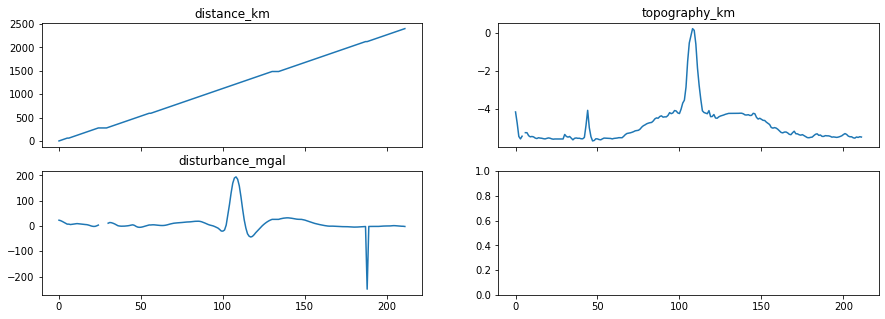

In [46]:
#Veamos...
car = ["distance_km", "topography_km", "disturbance_mgal"]

fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(15, 5))

#distance
data[car[0]].plot(ax=axes[0, 0])
axes[0,0].set_title(car[0])

#topo
data[car[1]].plot(ax=axes[0, 1])
axes[0,1].set_title(car[1])

#disturbance
data[car[2]].plot(ax=axes[1, 0])
axes[1,0].set_title(car[2])

In [42]:
#Rename heads
data2=data.rename(columns={"distance_km":"Distance(Km)", "disturbance_mgal":"Disturbance(Mgal)","topography_km":"Bathymetry(Km)"})
data2.head()

,latitude,longitude,Distance(Km),Bathymetry(Km),Disturbance(Mgal)
0,13.000000,-165.000000,0.000000,-4.161000,23.008098
1,13.082915,-164.929648,12.070042,-4.747907,21.180807
2,13.165829,-164.859296,24.140085,-5.452608,18.099661
3,13.248744,-164.788945,36.210127,-5.581402,14.372280
4,13.331658,-164.718593,48.280170,-5.438978,10.606283


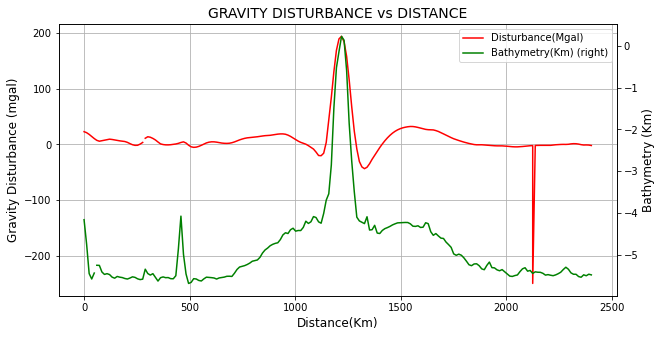

In [45]:
#Plot the gravity disturbance & distance and the bathymetry & distance using subplot. Make the plot as if you were going to use it for a scientific article.

graph = pd.DataFrame(data2)

fig, ax = plt.subplots()
graph.plot(x='Distance(Km)', y='Disturbance(Mgal)', kind='line', figsize=(10,5), color='Red', ax = ax)
plt.xlabel('Distance (Km)', size=12)
plt.ylabel('Gravity Disturbance (mgal)', size=12)

graph.plot(x ='Distance(Km)', y='Bathymetry(Km)', ax = ax, secondary_y = True, color='Green', grid=True) 
ax.right_ax.set_ylabel('Bathymetry (Km)', size=12)
plt.title("GRAVITY DISTURBANCE vs DISTANCE", fontsize=14)
plt.savefig("Gravity_vs_Distance.png", dpi=300)
plt.show()
